In [453]:
import matplotlib
import time
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
zhfont1 = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
%matplotlib inline
import matplotlib.dates as mdates
import pandas as pd
import glob
import csv
import numpy as np
import numpy
import datetime as dt
from IPython.display import clear_output
pd.set_option('display.max_columns', None)
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.optimize import linprog
from OpenHiveClient import *
from pandas.tseries.resample import TimeGrouper

from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.dates import WeekdayLocator
loc = WeekdayLocator(byweekday=(MO, TU, WE, TH, FR))

pd.options.mode.chained_assignment = None
from matplotlib.ticker import  FormatStrFormatter
from matplotlib.ticker import  MultipleLocator

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## 房山区

In [21]:
df_abtest = pd.read_csv('./bm_ABtest_三种策略_不分区域_北京房山0903.csv')

In [543]:
temp = dt.datetime.fromtimestamp(1474819200)
temp

datetime.datetime(2016, 9, 26, 0, 0)

In [541]:
1474732800+24*60*60

1474819200

In [24]:
df_abtest.head()

,ids.id,a.is_prebook,ids.bm_delivery_area_id,ids.pricetypeint,b.platform_poi_id,a.ctime,a.utime,b.pkg_value,b.pkg_price,b.total_amount,old_discount,total_discount,ids.computefee,b.delivery_fee,b.delivery_distance,b.delivery_distance_source,grab_time,grab_delivery_minutes
0,1472875064040165,0,1348,102,79300,1472875064,1472876268,61.5,53.5,7.35,15,15,4.5,4.5,1115,3,1472875350,15.300000
1,1472868962035648,0,1348,5,79300,1472868962,1472869659,33.0,28.0,5.00,15,15,4.0,4.0,1303,3,1472869037,10.366667
2,1472873794070550,0,1348,102,79300,1472873794,1472875820,69.2,59.2,8.10,15,15,5.2,5.2,2387,3,1472874022,29.966667
3,1472899346045347,0,1348,5,79300,1472899346,1472901846,146.5,136.5,19.80,15,15,4.5,4.5,2147,3,1472899399,40.783333
4,1472876145066690,0,1348,5,79300,1472876145,1472877817,53.0,45.0,6.15,15,15,4.0,4.0,1179,3,1472876182,27.250000


In [25]:
#取9月5日至9月11日，七天的数据
df_abtest=df_abtest[df_abtest['a.ctime']<1473609600]
df_abtest=df_abtest[df_abtest['a.ctime']>=1473004800]

In [26]:
df_poi = df_abtest.groupby(['b.platform_poi_id']).agg({
                                                            'b.pkg_value': np.mean,
                                                            'b.pkg_price': np.mean,
                                                            'ids.id': np.size
    }).reset_index()
df_poi.head()

,b.platform_poi_id,b.pkg_price,ids.id,b.pkg_value
0,79300,38.274227,97,43.232990
1,97454,31.924602,691,37.020116
2,100296,49.340455,220,50.358636
3,107040,37.748718,39,39.107692
4,112761,45.853237,417,48.167386


In [28]:
df_poi['pkg_value_int'] = df_poi['b.pkg_value'].apply(lambda x: int(x))
df_poi.head(20)

,b.platform_poi_id,b.pkg_price,ids.id,b.pkg_value,pkg_value_int
0,79300,38.274227,97,43.232990,43
1,97454,31.924602,691,37.020116,37
2,100296,49.340455,220,50.358636,50
3,107040,37.748718,39,39.107692,39
4,112761,45.853237,417,48.167386,48
5,114728,42.324490,196,52.453061,52
6,119943,36.068333,60,41.295000,41
7,149937,140.945000,20,171.895000,171
8,166419,45.196667,30,47.596667,47
9,168956,69.512500,32,82.534375,82


In [30]:
df_poi2 = df_poi.groupby(['pkg_value_int']).agg({
                                                            'b.platform_poi_id': np.size,
                                                            'ids.id': np.sum
    }).reset_index()
df_poi2.head()

,pkg_value_int,b.platform_poi_id,ids.id
0,27,5,87
1,28,1,4
2,29,3,4
3,30,6,52
4,31,7,205


In [31]:
df_poi2 = df_poi2.sort_values(['pkg_value_int']).reset_index(drop=True)
df_poi2.head()

,pkg_value_int,b.platform_poi_id,ids.id
0,27,5,87
1,28,1,4
2,29,3,4
3,30,6,52
4,31,7,205


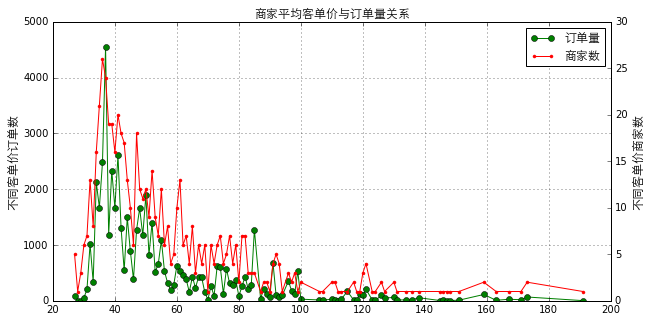

In [46]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

df_temp = df_poi2


lns1 = ax.plot(df_temp['pkg_value_int'], 
               df_temp['ids.id'], 
               'go-', 
               label = u'订单量')
ax2 = ax.twinx()
lns2 = ax2.plot(df_temp['pkg_value_int'], 
               df_temp['b.platform_poi_id'], 
               'r.-', 
               label = u'商家数')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best',prop=zhfont1)

ax.grid(True)

#ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
#ax.autoscale_view()

#ymajorFormatter1 = FormatStrFormatter('%3.2f%%')
#ax.yaxis.set_major_formatter(ymajorFormatter1)

#fig.autofmt_xdate()

ax.set_ylabel(u'不同客单价订单数', fontproperties=zhfont1)
ax2.set_ylabel(u'不同客单价商家数', fontproperties=zhfont1)
plt.xlabel(u'平均客单价', fontproperties=zhfont1)    

plt.title(u'商家平均客单价与订单量关系', fontproperties=zhfont1)
plt.show() 

In [36]:
df_poi3 = df_poi2.sort_values(['pkg_value_int'],ascending=False).reset_index(drop=True)
df_poi3.head()

,pkg_value_int,b.platform_poi_id,ids.id
0,191,1,3
1,173,2,68
2,171,1,20
3,167,1,27
4,163,1,9


In [37]:
df_poi3['poi_cnt'] = 0
df_poi3['order_cnt'] = 0
for i in range(0,len(df_poi3)):
    if(i==0):
        df_poi3.iloc[i,3] = df_poi3.iloc[i,1]
        df_poi3.iloc[i,4] = df_poi3.iloc[i,2]
    else:
        df_poi3.iloc[i,3] = df_poi3.iloc[i-1,3] + df_poi3.iloc[i,1]
        df_poi3.iloc[i,4] = df_poi3.iloc[i-1,4] + df_poi3.iloc[i,2]

df_poi3
        

,pkg_value_int,b.platform_poi_id,ids.id,poi_cnt,order_cnt
0,191,1,3,1,3
1,173,2,68,3,71
2,171,1,20,4,91
3,167,1,27,5,118
4,163,1,9,6,127
5,159,2,113,8,240
6,151,1,11,9,251
7,148,1,4,10,255
8,147,1,5,11,260
9,146,1,11,12,271


In [38]:
df_poi3['b.platform_poi_id'].sum()

612

In [39]:
df_poi3['ids.id'].sum()

50331

In [40]:
50331*0.2

10066.2

In [42]:
df_poi3.iloc[60:,:]

,pkg_value_int,b.platform_poi_id,ids.id,poi_cnt,order_cnt
60,70,1,22,150,9744
61,69,6,154,156,9898
62,68,4,420,160,10318
63,67,6,423,166,10741
64,66,3,235,169,10976
65,65,8,428,177,11404
66,64,4,158,181,11562
67,63,7,387,188,11949
68,62,6,459,194,12408
69,61,13,541,207,12949


In [44]:
1.000*156/612 

0.2549019607843137

## 南京

In [392]:
#df_res.to_csv('./data/商家客单价与单量关系-南京-0906to0912.csv', index = False)
df_nj_pre = pd.read_csv('./data/商家客单价与单量关系-南京-0906to0912.csv')

In [357]:
df_poi_price = pd.read_csv('./data/poi2.csv', sep=";")
df_poi_price.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,b.pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20


### 商家平均客单价为横轴

In [358]:
#取9月6日至9月12日，七天的数据
df_nj=df_poi_price
df_nj=df_nj[df_nj['a.ctime']<1473696000]
df_nj=df_nj[df_nj['a.ctime']>=1473091200]
df_nj=df_nj[df_nj['b.pkg_value']<=400]
df_nj.rename(columns={'b.pkg_value':'pkg_value'},inplace=True)
df_nj['b.pkg_value'] = df_nj['pkg_value'] - df_nj['b.delivery_fee']

df_poi_nj = df_nj.groupby(['b.platform_poi_id']).agg({
                                                            'b.pkg_value': np.mean,
                                                            'b.pkg_price': np.mean,
                                                            'waybill.id': np.size
    }).reset_index()

df_poi_nj['pkg_value_int'] = df_poi_nj['b.pkg_value'].apply(lambda x: int(x))
df_poi_nj2 = df_poi_nj.groupby(['pkg_value_int']).agg({
                                                            'b.platform_poi_id': np.size,
                                                            'waybill.id': np.sum
    }).reset_index()
df_poi_nj2 = df_poi_nj2.sort_values(['pkg_value_int']).reset_index(drop=True)
df_poi_nj2.head()

,pkg_value_int,b.platform_poi_id,waybill.id
0,20,45,94
1,21,74,284
2,22,90,462
3,23,100,1556
4,24,152,3974


In [359]:
df_poi_nj.describe()

,b.platform_poi_id,waybill.id,b.pkg_price,b.pkg_value,pkg_value_int
count,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000
mean,907509.789826,52.925016,44.068071,44.918885,44.507001
std,359866.044084,111.122576,25.402264,25.879250,25.902009
min,15512.000000,1.000000,7.100000,20.000000,20.000000
25%,642949.750000,4.000000,29.261072,29.666667,29.000000
50%,920708.500000,15.000000,35.390598,35.979130,35.000000
75%,1210125.500000,48.000000,49.943750,51.211313,51.000000
max,1492512.000000,1873.000000,325.000000,340.000000,340.000000


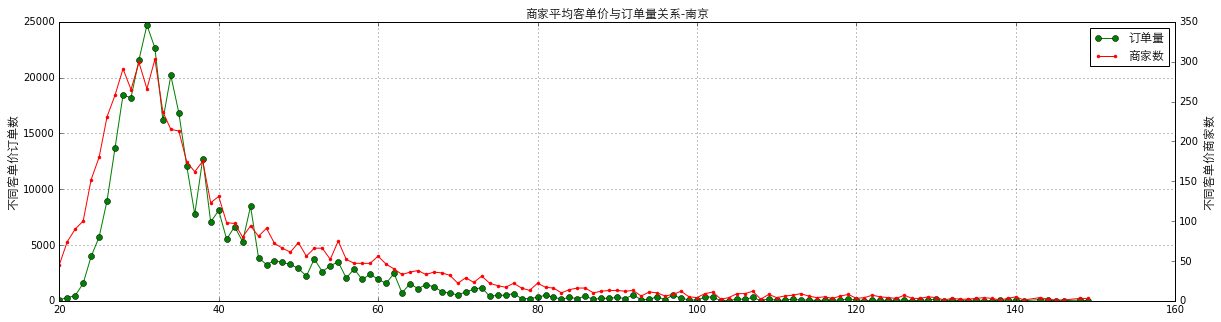

In [360]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)

df_temp = df_poi_nj2[df_poi_nj2['pkg_value_int']<150]


lns1 = ax.plot(df_temp['pkg_value_int'], 
               df_temp['waybill.id'], 
               'go-', 
               label = u'订单量')
ax2 = ax.twinx()
lns2 = ax2.plot(df_temp['pkg_value_int'], 
               df_temp['b.platform_poi_id'], 
               'r.-', 
               label = u'商家数')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best',prop=zhfont1)

ax.grid(True)

ax.set_ylabel(u'不同客单价订单数', fontproperties=zhfont1)
ax2.set_ylabel(u'不同客单价商家数', fontproperties=zhfont1)
plt.xlabel(u'平均客单价', fontproperties=zhfont1)    

plt.title(u'商家平均客单价与订单量关系-南京', fontproperties=zhfont1)
plt.show() 

In [361]:
df_poi_nj3 = df_poi_nj2.sort_values(['pkg_value_int'],ascending=False).reset_index(drop=True)
df_poi_nj3['poi_cnt'] = 0
df_poi_nj3['order_cnt'] = 0
for i in range(0,len(df_poi_nj3)):
    if(i==0):
        df_poi_nj3.iloc[i,3] = df_poi_nj3.iloc[i,1]
        df_poi_nj3.iloc[i,4] = df_poi_nj3.iloc[i,2]
    else:
        df_poi_nj3.iloc[i,3] = df_poi_nj3.iloc[i-1,3] + df_poi_nj3.iloc[i,1]
        df_poi_nj3.iloc[i,4] = df_poi_nj3.iloc[i-1,4] + df_poi_nj3.iloc[i,2]

df_poi_nj3

,pkg_value_int,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
0,340,1,1,1,1
1,288,1,1,2,2
2,266,1,1,3,3
3,264,1,1,4,4
4,258,1,2,5,6
5,235,1,7,6,13
6,234,1,3,7,16
7,230,1,2,8,18
8,228,1,4,9,22
9,227,1,4,10,26


In [362]:
df_poi_nj3.iloc[120:,:]

,pkg_value_int,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
120,72,23,1024,687,13492
121,71,29,799,716,14291
122,70,22,519,738,14810
123,69,32,693,770,15503
124,68,35,822,805,16325
125,67,36,1257,841,17582
126,66,33,1453,874,19035
127,65,38,1085,912,20120
128,64,36,1533,948,21653
129,63,33,702,981,22355


In [363]:
df_poi_nj3['waybill.id'].sum()

340202

In [364]:
df_poi_nj3['b.platform_poi_id'].sum()

6428

In [367]:
340202*0.2

68040.40000000001

In [368]:
1.000*1903/6428

0.29604853764779093

In [369]:
1.00*65899/340202

0.19370550437681142

#### 高客单价商家单量稳定性检查

In [370]:
df_nj.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20,21.0
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20,31.0
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20,23.0
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20,21.0
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20,33.5


In [371]:
df_nj['time'] = df_nj['a.ctime'].apply(lambda x: dt.datetime.fromtimestamp(x))
df_nj['date'] = df_nj['time'].apply(lambda x:x.date())
df_nj.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,time,date
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20,21.0,2016-09-06 11:15:00,2016-09-06
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20,31.0,2016-09-07 11:10:57,2016-09-07
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20,23.0,2016-09-09 15:05:44,2016-09-09
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20,21.0,2016-09-09 14:32:47,2016-09-09
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20,33.5,2016-09-12 10:17:33,2016-09-12


In [372]:
f1 = lambda x: x.strftime('%Y%m%d')
df_nj['dt']=df_nj['date'].apply(f1)
df_nj.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,time,date,dt
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20,21.0,2016-09-06 11:15:00,2016-09-06,20160906
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20,31.0,2016-09-07 11:10:57,2016-09-07,20160907
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20,23.0,2016-09-09 15:05:44,2016-09-09,20160909
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20,21.0,2016-09-09 14:32:47,2016-09-09,20160909
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20,33.5,2016-09-12 10:17:33,2016-09-12,20160912


In [373]:
df_order_check = df_nj.groupby(['b.platform_poi_id']).agg({
                                                            'b.pkg_value': np.mean,
                                                            'waybill.id': np.size
    }).reset_index()

df_order_check['pkg_value_int'] = df_order_check['b.pkg_value'].apply(lambda x: int(x))
df_order_check = df_order_check[df_order_check['pkg_value_int']>=47]  #取高客单价商家列表

df_order_check.head()


,b.platform_poi_id,waybill.id,b.pkg_value,pkg_value_int
13,23890,13,90.461538,90
25,45271,18,55.222222,55
36,62031,59,49.949153,49
40,65351,145,72.337931,72
42,66430,50,48.780000,48


In [374]:
df_nj.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,time,date,dt
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20,21.0,2016-09-06 11:15:00,2016-09-06,20160906
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20,31.0,2016-09-07 11:10:57,2016-09-07,20160907
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20,23.0,2016-09-09 15:05:44,2016-09-09,20160909
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20,21.0,2016-09-09 14:32:47,2016-09-09,20160909
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20,33.5,2016-09-12 10:17:33,2016-09-12,20160912


In [375]:
df_poi_ordercnt = df_nj.groupby(['dt','b.platform_poi_id']).agg({
        'waybill.id':np.size,
        'b.pkg_value':np.mean
    }).reset_index()
df_ordercnt = df_nj.groupby(['dt']).agg({
        'waybill.id':np.size,
        'b.pkg_value':np.mean
    }).reset_index()
df_ordercnt = pd.merge(df_poi_ordercnt,df_ordercnt,how='left',on=['dt'])
df_ordercnt
#waybill.id_y表示南京市在这一天总单量

,dt,b.platform_poi_id,waybill.id_x,b.pkg_value_x,waybill.id_y,b.pkg_value_y
0,20160906,15512,90,32.561111,46448,38.866521
1,20160906,15699,38,34.484211,46448,38.866521
2,20160906,15846,81,31.493827,46448,38.866521
3,20160906,15870,28,28.000000,46448,38.866521
4,20160906,15923,8,25.087500,46448,38.866521
5,20160906,16008,9,32.111111,46448,38.866521
6,20160906,17621,33,35.303030,46448,38.866521
7,20160906,17823,6,37.433333,46448,38.866521
8,20160906,20120,10,39.550000,46448,38.866521
9,20160906,22459,65,29.115385,46448,38.866521


In [376]:
df_order_check2 = pd.merge(df_order_check,df_ordercnt,how='left',on=['b.platform_poi_id'])
df_order_check2

,b.platform_poi_id,waybill.id,b.pkg_value,pkg_value_int,dt,waybill.id_x,b.pkg_value_x,waybill.id_y,b.pkg_value_y
0,23890,13,90.461538,90,20160906,1,89.000000,46448,38.866521
1,23890,13,90.461538,90,20160907,1,45.000000,46427,38.950337
2,23890,13,90.461538,90,20160908,2,81.250000,45506,39.133048
3,23890,13,90.461538,90,20160909,2,150.000000,48895,40.062695
4,23890,13,90.461538,90,20160910,1,109.000000,53792,40.571160
5,23890,13,90.461538,90,20160911,3,68.500000,53096,40.185931
6,23890,13,90.461538,90,20160912,3,88.333333,46038,38.885694
7,45271,18,55.222222,55,20160906,3,53.000000,46448,38.866521
8,45271,18,55.222222,55,20160907,4,35.000000,46427,38.950337
9,45271,18,55.222222,55,20160908,2,53.000000,45506,39.133048


In [377]:
df_order_check3 = df_order_check2.groupby(['dt']).agg({
        'waybill.id_x':np.sum,
        'waybill.id_y':np.mean
    }).reset_index()
df_order_check3

,dt,waybill.id_x,waybill.id_y
0,20160906,8819,46448
1,20160907,8685,46427
2,20160908,8518,45506
3,20160909,9408,48895
4,20160910,11013,53792
5,20160911,10907,53096
6,20160912,8549,46038


In [378]:
df_order_check3['percent'] = 1.00* df_order_check3['waybill.id_x']/df_order_check3['waybill.id_y']
df_order_check3

,dt,waybill.id_x,waybill.id_y,percent
0,20160906,8819,46448,0.189868
1,20160907,8685,46427,0.187068
2,20160908,8518,45506,0.187184
3,20160909,9408,48895,0.192412
4,20160910,11013,53792,0.204733
5,20160911,10907,53096,0.205420
6,20160912,8549,46038,0.185694


In [379]:
df_order_check3.rename(columns={'waybill.id_x':'order_cnt_high_poi',
                               'waybill.id_y':'order_cnt_nj'},inplace=True)
df_order_check3

,dt,order_cnt_high_poi,order_cnt_nj,percent
0,20160906,8819,46448,0.189868
1,20160907,8685,46427,0.187068
2,20160908,8518,45506,0.187184
3,20160909,9408,48895,0.192412
4,20160910,11013,53792,0.204733
5,20160911,10907,53096,0.205420
6,20160912,8549,46038,0.185694


In [380]:
df_order_check4 = df_order_check3[(df_order_check3['dt']!='20160910')&(df_order_check3['dt']!='20160911')]
df_order_check4['percent_mean'] = df_order_check4['percent'].mean()
df_order_check4['percent_diff_abs'] = abs(df_order_check4['percent']-df_order_check4['percent_mean'])

In [381]:
df_order_check4

,dt,order_cnt_high_poi,order_cnt_nj,percent,percent_mean,percent_diff_abs
0,20160906,8819,46448,0.189868,0.188445,0.001423
1,20160907,8685,46427,0.187068,0.188445,0.001378
2,20160908,8518,45506,0.187184,0.188445,0.001261
3,20160909,9408,48895,0.192412,0.188445,0.003967
6,20160912,8549,46038,0.185694,0.188445,0.002751


In [382]:
df_order_check4['percent_diff_abs'].mean()

0.0021559078161422717

In [383]:
df_order_check4['order_cnt_high_poi_mean'] = df_order_check4['order_cnt_high_poi'].mean()
df_order_check4['order_diff_abs'] = abs(df_order_check4['order_cnt_high_poi_mean'] - df_order_check4['order_cnt_high_poi'])
df_order_check4

,dt,order_cnt_high_poi,order_cnt_nj,percent,percent_mean,percent_diff_abs,order_cnt_high_poi_mean,order_diff_abs
0,20160906,8819,46448,0.189868,0.188445,0.001423,8795.8,23.2
1,20160907,8685,46427,0.187068,0.188445,0.001378,8795.8,110.8
2,20160908,8518,45506,0.187184,0.188445,0.001261,8795.8,277.8
3,20160909,9408,48895,0.192412,0.188445,0.003967,8795.8,612.2
6,20160912,8549,46038,0.185694,0.188445,0.002751,8795.8,246.8


In [384]:
df_order_check4['order_diff_abs'].mean()

254.15999999999985

##### 高客单价商家订单的客单价检查

In [385]:
df_nj.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,time,date,dt
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20,21.0,2016-09-06 11:15:00,2016-09-06,20160906
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20,31.0,2016-09-07 11:10:57,2016-09-07,20160907
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20,23.0,2016-09-09 15:05:44,2016-09-09,20160909
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20,21.0,2016-09-09 14:32:47,2016-09-09,20160909
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20,33.5,2016-09-12 10:17:33,2016-09-12,20160912


In [386]:
df_poi_pkg_value = df_nj.groupby(['b.platform_poi_id']).agg({
        'waybill.id':np.size,
        'b.pkg_value':np.mean
    }).reset_index()
df_poi_pkg_value.rename(columns={
        'waybill.id':'order_cnt',
        'b.pkg_value':'poi_pkg_value'
    },inplace=True)
df_nj2 = pd.merge(df_nj,df_poi_pkg_value,how='left',on=['b.platform_poi_id'])
df_nj2

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,time,date,dt,order_cnt,poi_pkg_value
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20,21.0,2016-09-06 11:15:00,2016-09-06,20160906,519,31.219653
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20,31.0,2016-09-07 11:10:57,2016-09-07,20160907,519,31.219653
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20,23.0,2016-09-09 15:05:44,2016-09-09,20160909,519,31.219653
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20,21.0,2016-09-09 14:32:47,2016-09-09,20160909,519,31.219653
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20,33.5,2016-09-12 10:17:33,2016-09-12,20160912,519,31.219653
5,1473567714042976,20160911,320100,15512,1473567714,1473568927,27.0,21.00,3,20,24.0,2016-09-11 12:21:54,2016-09-11,20160911,519,31.219653
6,1473307589026490,20160908,320100,15512,1473307589,1473309411,29.0,24.58,3,20,26.0,2016-09-08 12:06:29,2016-09-08,20160908,519,31.219653
7,1473224870017490,20160907,320100,15512,1473224870,1473227261,28.0,22.00,3,20,25.0,2016-09-07 13:07:50,2016-09-07,20160907,519,31.219653
8,1473473917005681,20160910,320100,15512,1473473917,1473474598,23.0,17.00,3,20,20.0,2016-09-10 10:18:37,2016-09-10,20160910,519,31.219653
9,1473672441034470,20160912,320100,15512,1473672441,1473673943,33.0,21.00,3,20,30.0,2016-09-12 17:27:21,2016-09-12,20160912,519,31.219653


In [387]:
df_nj2[df_nj2['poi_pkg_value']>=47].describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,order_cnt,poi_pkg_value
count,6.589900e+04,65899.000000,65899,65899.000000,6.589900e+04,6.589900e+04,65899.000000,65899.000000,65899.000000,65899.000000,65899.000000,65899.000000,65899.000000
mean,1.473413e+15,20160909.093006,320100,778274.067619,1.473413e+09,1.473415e+09,67.841220,59.239126,4.068081,21.746172,63.773138,191.721407,63.773138
std,1.698763e+11,1.961885,0,363821.284643,1.698763e+05,1.698691e+05,40.437083,39.812189,0.907083,6.999021,40.347177,191.624793,18.537716
min,1.473091e+15,20160906.000000,320100,23890.000000,1.473091e+09,1.473093e+09,22.000000,2.000000,0.000000,20.000000,20.000000,1.000000,47.000000
25%,1.473248e+15,20160907.000000,320100,473425.000000,1.473248e+09,1.473250e+09,41.000000,33.000000,4.000000,20.000000,37.000000,45.000000,52.248485
50%,1.473416e+15,20160909.000000,320100,759144.000000,1.473416e+09,1.473418e+09,57.000000,48.000000,4.000000,20.000000,53.000000,126.000000,57.732301
75%,1.473565e+15,20160911.000000,320100,1081551.000000,1.473565e+09,1.473568e+09,81.500000,72.000000,4.000000,20.000000,77.000000,258.000000,67.761538
max,1.473696e+15,20160912.000000,320100,1485128.000000,1.473696e+09,1.473699e+09,399.000000,399.000000,13.000000,150.000000,395.000000,769.000000,340.000000


In [397]:
#df_temp = df_nj2[df_nj2['poi_pkg_value']>=47]
df_temp2 = df_temp['b.platform_poi_id','waybill.bm_delivery_area_id'].unique()

KeyError: ('b.platform_poi_id', 'waybill.bm_delivery_area_id')

In [399]:
df_temp2.head()
df_temp2.rename(columns={0:'b.platform_poi_id'},inplace=True)

In [400]:
columns = ['b.platform_poi_id','waybill.bm_delivery_area_id']
df_nj_pre2 = df_nj_pre[columns]
df_nj_temp2 = pd.merge(df_temp2,df_nj_pre2,how='left')
df_nj_temp2.head()

,b.platform_poi_id,waybill.bm_delivery_area_id
0,23890,2000837
1,23890,2000837
2,23890,2000837
3,23890,2000837
4,23890,2000837


In [404]:
df_temp4 = df_nj_temp2.drop_duplicates()

In [403]:
len(df_temp2)

1903

In [405]:
df_temp4.to_csv('./data/南京高客单价商家列表.csv', index = False)

##### 目前结论：使用订单占20%的平均客单价最高的1903个商家，作为实验对象。

##### 检查这1903个商家的稳定性

In [304]:
df_nj2.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,time,date,dt,order_cnt,poi_pkg_value
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20,21.0,2016-09-06 11:15:00,2016-09-06,20160906,519,31.219653
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20,31.0,2016-09-07 11:10:57,2016-09-07,20160907,519,31.219653
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20,23.0,2016-09-09 15:05:44,2016-09-09,20160909,519,31.219653
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20,21.0,2016-09-09 14:32:47,2016-09-09,20160909,519,31.219653
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20,33.5,2016-09-12 10:17:33,2016-09-12,20160912,519,31.219653


In [306]:
df_nj_0906 = df_nj2[df_nj2['dt']=='20160906']
df_nj_0907 = df_nj2[df_nj2['dt']=='20160907']
df_nj_0908 = df_nj2[df_nj2['dt']=='20160908']
df_nj_0909 = df_nj2[df_nj2['dt']=='20160909']
df_nj_0910 = df_nj2[df_nj2['dt']=='20160910']
df_nj_0911 = df_nj2[df_nj2['dt']=='20160911']
df_nj_0912 = df_nj2[df_nj2['dt']=='20160912']

In [336]:
df_temp = df_nj_0912 #df_temp是单天全量
df_temp1903 = df_temp[df_temp['poi_pkg_value']>=47]  #df_temp1903是单天高配送费商家的订单
df_temp1903.describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,order_cnt,poi_pkg_value
count,8.549000e+03,8549,8549,8549.000000,8.549000e+03,8.549000e+03,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,1.473664e+15,20160912,320100,786217.009943,1.473664e+09,1.473666e+09,65.797864,56.876665,4.026904,21.719382,61.770960,199.831091,62.815185
std,1.378748e+10,0,0,370424.884719,1.378748e+04,1.360360e+04,39.467126,38.495001,0.909306,7.096598,39.363045,196.973805,17.251931
min,1.473610e+15,20160912,320100,23890.000000,1.473610e+09,1.473611e+09,23.000000,3.000000,0.000000,20.000000,20.000000,1.000000,47.000000
25%,1.473651e+15,20160912,320100,485052.000000,1.473651e+09,1.473653e+09,40.000000,32.000000,3.000000,20.000000,36.000000,45.000000,52.085366
50%,1.473661e+15,20160912,320100,771110.000000,1.473661e+09,1.473663e+09,54.800000,45.500000,4.000000,20.000000,50.500000,136.000000,57.601732
75%,1.473675e+15,20160912,320100,1104083.000000,1.473675e+09,1.473677e+09,78.000000,68.000000,4.000000,20.000000,74.000000,262.000000,66.846154
max,1.473696e+15,20160912,320100,1485128.000000,1.473696e+09,1.473699e+09,391.000000,380.000000,10.000000,120.000000,388.000000,769.000000,228.000000


In [337]:
1.00*len(df_temp1903)/len(df_temp)

0.1856944263434554

In [338]:
df_temp1903['b.platform_poi_id'].nunique()

1212

In [339]:
df_temp.describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,order_cnt,poi_pkg_value
count,4.603800e+04,46038,46038,46038.000000,4.603800e+04,4.603800e+04,46038.000000,46038.000000,46038.000000,46038.000000,46038.000000,46038.000000,46038.000000
mean,1.473662e+15,20160912,320100,830832.539228,1.473662e+09,1.473664e+09,42.674238,35.374992,3.788544,20.516921,38.885694,294.745992,39.140972
std,1.297446e+10,0,0,374523.433883,1.297446e+04,1.281045e+04,26.225802,24.923290,0.810879,3.385995,26.130785,319.116105,14.339464
min,1.473610e+15,20160912,320100,15512.000000,1.473610e+09,1.473611e+09,21.000000,2.000000,0.000000,0.000000,20.000000,1.000000,20.000000
25%,1.473651e+15,20160912,320100,534490.000000,1.473651e+09,1.473653e+09,28.000000,23.000000,3.000000,20.000000,24.000000,71.000000,30.657407
50%,1.473658e+15,20160912,320100,850673.000000,1.473658e+09,1.473659e+09,34.000000,28.000000,4.000000,20.000000,30.000000,193.000000,34.362745
75%,1.473674e+15,20160912,320100,1117732.000000,1.473674e+09,1.473676e+09,47.000000,39.000000,4.000000,20.000000,44.000000,397.000000,42.744000
max,1.473696e+15,20160912,320100,1492512.000000,1.473696e+09,1.473699e+09,391.000000,380.000000,10.000000,120.000000,388.000000,1873.000000,228.000000


### 商家起送价为横轴

In [101]:
df_nj.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,b.pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price
0,1473131700012567,20160906,320100,15512,1473131700,1473132756,24.0,17.00,3,20
1,1473217857062027,20160907,320100,15512,1473217857,1473220055,34.0,25.28,3,20
2,1473404744007103,20160909,320100,15512,1473404744,1473405366,26.0,20.00,3,20
3,1473402767026680,20160909,320100,15512,1473402767,1473403829,24.0,18.00,3,20
4,1473646653003422,20160912,320100,15512,1473646653,1473647336,36.5,27.78,3,20


In [182]:
df_minprice_nj = df_nj.groupby(['b.platform_poi_id']).agg({
                                                            'poi.poi_min_price': np.min,
                                                            'b.pkg_value':np.mean,
                                                            'waybill.id': np.size
    }).reset_index()

df_minprice_nj2 = df_minprice_nj[df_minprice_nj['b.pkg_value']>=58].groupby(['poi.poi_min_price']).agg({
                                                            'b.platform_poi_id': np.size,
                                                            'waybill.id': np.sum
    }).reset_index()
df_minprice_nj2 = df_minprice_nj2.sort_values(['poi.poi_min_price']).reset_index(drop=True)
df_minprice_nj2.head()

,poi.poi_min_price,b.platform_poi_id,waybill.id
0,20,933,27062
1,21,5,34
2,22,1,12
3,23,1,1
4,25,33,640


In [183]:
df_minprice_nj2

,poi.poi_min_price,b.platform_poi_id,waybill.id
0,20,933,27062
1,21,5,34
2,22,1,12
3,23,1,1
4,25,33,640
5,27,1,4
6,28,5,235
7,30,126,2757
8,35,28,295
9,38,1,5


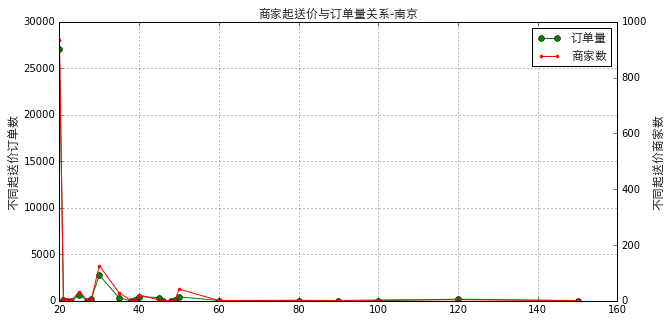

In [184]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

df_temp = df_minprice_nj2


lns1 = ax.plot(df_temp['poi.poi_min_price'], 
               df_temp['waybill.id'], 
               'go-', 
               label = u'订单量')
ax2 = ax.twinx()
lns2 = ax2.plot(df_temp['poi.poi_min_price'], 
               df_temp['b.platform_poi_id'], 
               'r.-', 
               label = u'商家数')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best',prop=zhfont1)

ax.grid(True)

ax.set_ylabel(u'不同起送价订单数', fontproperties=zhfont1)
ax2.set_ylabel(u'不同起送价商家数', fontproperties=zhfont1)
plt.xlabel(u'起送价', fontproperties=zhfont1)    

plt.title(u'商家起送价与订单量关系-南京', fontproperties=zhfont1)
plt.show() 

In [185]:
df_minprice_nj3 = df_minprice_nj2.sort_values(['poi.poi_min_price'],ascending=False).reset_index(drop=True)

In [186]:
df_minprice_nj3.head()

,poi.poi_min_price,b.platform_poi_id,waybill.id
0,150,1,2
1,120,4,176
2,100,3,8
3,90,1,1
4,80,2,8


In [187]:
df_minprice_nj3['poi_cnt'] = 0
df_minprice_nj3['order_cnt'] = 0
for i in range(0,len(df_minprice_nj3)):
    if(i==0):
        df_minprice_nj3.iloc[i,3] = df_minprice_nj3.iloc[i,1]
        df_minprice_nj3.iloc[i,4] = df_minprice_nj3.iloc[i,2]
    else:
        df_minprice_nj3.iloc[i,3] = df_minprice_nj3.iloc[i-1,3] + df_minprice_nj3.iloc[i,1]
        df_minprice_nj3.iloc[i,4] = df_minprice_nj3.iloc[i-1,4] + df_minprice_nj3.iloc[i,2]

df_minprice_nj3
        

,poi.poi_min_price,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
0,150,1,2,1,2
1,120,4,176,5,178
2,100,3,8,8,186
3,90,1,1,9,187
4,80,2,8,11,195
5,60,1,31,12,226
6,50,42,430,54,656
7,49,2,55,56,711
8,48,1,7,57,718
9,46,1,4,58,722


In [188]:
df_minprice_nj3['poi_cnt_percent'] = df_minprice_nj3['poi_cnt']/df_minprice_nj3['b.platform_poi_id'].sum()
df_minprice_nj3['order_cnt_percent'] = df_minprice_nj3['order_cnt']/df_minprice_nj3['waybill.id'].sum()

In [189]:
df_minprice_nj3

,poi.poi_min_price,b.platform_poi_id,waybill.id,poi_cnt,order_cnt,poi_cnt_percent,order_cnt_percent
0,150,1,2,1,2,0.000822,0.000061
1,120,4,176,5,178,0.004108,0.005462
2,100,3,8,8,186,0.006574,0.005707
3,90,1,1,9,187,0.007395,0.005738
4,80,2,8,11,195,0.009039,0.005983
5,60,1,31,12,226,0.009860,0.006934
6,50,42,430,54,656,0.044371,0.020128
7,49,2,55,56,711,0.046015,0.021816
8,48,1,7,57,718,0.046836,0.022031
9,46,1,4,58,722,0.047658,0.022153


In [190]:
df_minprice_nj['poi.poi_min_price'].mean()

21.293714996888614

In [199]:
df_nj['b.pkg_value'].mean()

39.563580020105682

In [203]:
1.000 *57/6428

0.008867454884878655

In [289]:
df_nj.describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value
count,3.402020e+05,340202.000000,340202,340202.000000,3.402020e+05,3.402020e+05,340202.000000,340202.000000,340202.000000,340202.000000,340202.000000
mean,1.473409e+15,20160909.059947,320100,822918.130070,1.473409e+09,1.473410e+09,43.387283,36.256403,3.823703,20.546111,39.563580
std,1.711932e+11,1.976149,0,368584.803156,1.711932e+05,1.711644e+05,26.915642,25.739775,0.824068,3.423869,26.817641
min,1.473091e+15,20160906.000000,320100,15512.000000,1.473091e+09,1.473092e+09,21.000000,0.010000,0.000000,0.000000,20.000000
25%,1.473245e+15,20160907.000000,320100,530594.250000,1.473245e+09,1.473247e+09,28.000000,23.000000,3.000000,20.000000,24.000000
50%,1.473411e+15,20160909.000000,320100,850635.000000,1.473411e+09,1.473413e+09,34.200000,28.000000,4.000000,20.000000,30.300000
75%,1.473565e+15,20160911.000000,320100,1105282.000000,1.473565e+09,1.473567e+09,48.000000,40.000000,4.000000,20.000000,44.085000
max,1.473696e+15,20160912.000000,320100,1492512.000000,1.473696e+09,1.473699e+09,399.000000,399.000000,13.000000,150.000000,395.000000


## 天津

In [406]:
df_poi_price = pd.read_csv('./data/poi-tj.csv', sep=";")
df_poi_price.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,b.pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price
0,1473654436058715,20160912,120100,6329,1473654436,1473656666,30,30,4,20
1,1473907002058766,20160915,120100,6329,1473907002,1473908601,50,50,4,20
2,1474073734040142,20160917,120100,6329,1474073734,1474079577,76,71,4,20
3,1473913301035585,20160915,120100,6329,1473913301,1473915205,72,67,4,20
4,1473908552043917,20160915,120100,6329,1473908552,1473909502,36,36,4,20


In [414]:
#取9月11日至9月17日，七天的数据
df_tj=df_poi_price
df_tj=df_tj[df_tj['a.ctime']<1474128000]
df_tj=df_tj[df_tj['a.ctime']>=1473523200]
df_tj=df_tj[df_tj['b.pkg_value']<=400]
df_tj.rename(columns={'b.pkg_value':'pkg_value'},inplace=True)
df_tj['b.pkg_value'] = df_tj['pkg_value'] - df_tj['b.delivery_fee']

df_poi_tj = df_tj.groupby(['b.platform_poi_id']).agg({
                                                            'b.pkg_value': np.mean,
                                                            'b.pkg_price': np.mean,
                                                            'waybill.id': np.size
    }).reset_index()

df_poi_tj['pkg_value_int'] = df_poi_tj['b.pkg_value'].apply(lambda x: int(x))
df_poi_tj2 = df_poi_tj.groupby(['pkg_value_int']).agg({
                                                            'b.platform_poi_id': np.size,
                                                            'waybill.id': np.sum
    }).reset_index()
df_poi_tj2 = df_poi_tj2.sort_values(['pkg_value_int']).reset_index(drop=True)
df_poi_tj2.head()

,pkg_value_int,b.platform_poi_id,waybill.id
0,20,35,72
1,21,50,217
2,22,53,496
3,23,73,836
4,24,83,1932


In [415]:
df_poi_tj.describe()

,b.platform_poi_id,waybill.id,b.pkg_price,b.pkg_value,pkg_value_int
count,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000
mean,866879.140174,41.044042,45.695028,46.384761,45.966018
std,358011.428557,65.332688,26.437486,26.462618,26.474356
min,6329.000000,1.000000,9.000000,20.000000,20.000000
25%,584634.000000,5.000000,30.000000,30.278689,30.000000
50%,861340.000000,17.000000,36.250000,37.019048,37.000000
75%,1174472.000000,47.000000,51.363636,53.000000,53.000000
max,1507569.000000,785.000000,279.000000,274.000000,274.000000


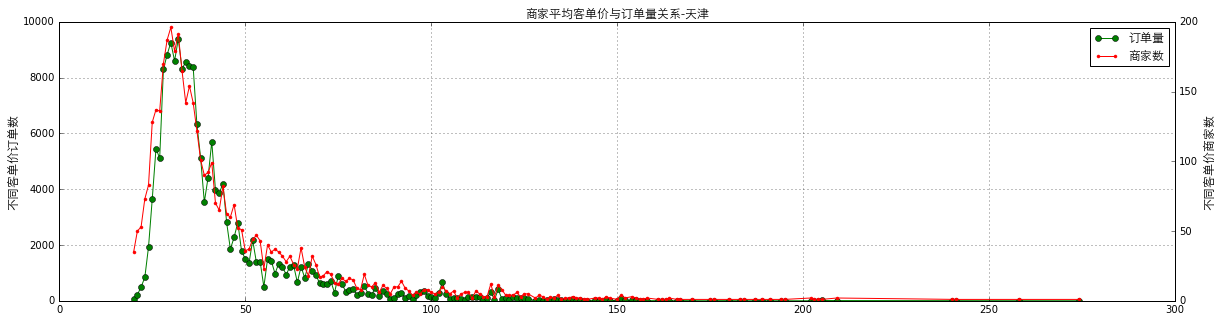

In [436]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)

df_temp = df_poi_tj2
#[df_poi_tj2['pkg_value_int']<150]


lns1 = ax.plot(df_temp['pkg_value_int'], 
               df_temp['waybill.id'], 
               'go-', 
               label = u'订单量')
ax2 = ax.twinx()
lns2 = ax2.plot(df_temp['pkg_value_int'], 
               df_temp['b.platform_poi_id'], 
               'r.-', 
               label = u'商家数')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best',prop=zhfont1)

ax.grid(True)

ax.set_ylabel(u'不同客单价订单数', fontproperties=zhfont1)
ax2.set_ylabel(u'不同客单价商家数', fontproperties=zhfont1)
plt.xlabel(u'平均客单价', fontproperties=zhfont1)    

plt.title(u'商家平均客单价与订单量关系-天津', fontproperties=zhfont1)
plt.show() 

In [419]:
df_poi_tj3 = df_poi_tj2.sort_values(['pkg_value_int'],ascending=False).reset_index(drop=True)
df_poi_tj3['poi_cnt'] = 0
df_poi_tj3['order_cnt'] = 0
for i in range(0,len(df_poi_tj3)):
    if(i==0):
        df_poi_tj3.iloc[i,3] = df_poi_tj3.iloc[i,1]
        df_poi_tj3.iloc[i,4] = df_poi_tj3.iloc[i,2]
    else:
        df_poi_tj3.iloc[i,3] = df_poi_tj3.iloc[i-1,3] + df_poi_tj3.iloc[i,1]
        df_poi_tj3.iloc[i,4] = df_poi_tj3.iloc[i-1,4] + df_poi_tj3.iloc[i,2]

df_poi_tj3

,pkg_value_int,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
0,274,1,1,1,1
1,258,1,1,2,2
2,241,1,2,3,4
3,240,1,3,4,7
4,209,2,8,6,15
5,205,1,11,7,26
6,204,1,1,8,27
7,203,1,1,9,28
8,202,2,4,11,32
9,195,1,1,12,33


In [425]:
df_poi_tj3.iloc[100:,:]

,pkg_value_int,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
100,80,9,216,420,9406
101,79,15,440,435,9846
102,78,16,398,451,10244
103,77,14,331,465,10575
104,76,16,609,481,11184
105,75,12,891,493,12075
106,74,13,289,506,12364
107,73,19,706,525,13070
108,72,21,600,546,13670
109,71,18,617,564,14287


In [420]:
df_poi_tj3['waybill.id'].sum()

183590

In [421]:
df_poi_tj3['b.platform_poi_id'].sum()

4473

In [445]:
183590*0.4

73436.0

In [ ]:
1.000*1217/6428

In [ ]:
1.00*65899/340202

In [428]:
df_tj.describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value
count,1.835900e+05,183590.000000,183590,183590.000000,1.835900e+05,1.835900e+05,183590.000000,183590.000000,183590.000000,183590.000000,183590.000000
mean,1.473835e+15,20160913.999820,120100,792799.478904,1.473835e+09,1.473837e+09,46.561363,41.598325,3.733542,20.716433,42.827821
std,1.799259e+11,2.078931,0,374531.089227,1.799259e+05,1.799501e+05,31.140110,30.232156,0.739620,2.946586,31.023209
min,1.473545e+15,20160911.000000,120100,6329.000000,1.473545e+09,1.473548e+09,22.000000,0.400000,2.000000,0.000000,20.000000
25%,1.473670e+15,20160912.000000,120100,491118.000000,1.473670e+09,1.473672e+09,28.000000,25.000000,3.000000,20.000000,25.000000
50%,1.473831e+15,20160914.000000,120100,786051.000000,1.473831e+09,1.473833e+09,36.000000,31.800000,4.000000,20.000000,32.000000
75%,1.474001e+15,20160916.000000,120100,1091758.000000,1.474001e+09,1.474003e+09,53.000000,46.000000,4.000000,20.000000,49.000000
max,1.474126e+15,20160917.000000,120100,1507569.000000,1.474126e+09,1.474128e+09,400.000000,400.000000,8.000000,100.000000,396.000000


#### 起送价检查

In [446]:
df_minprice_tj = df_tj.groupby(['b.platform_poi_id']).agg({
                                                            'poi.poi_min_price': np.min,
                                                            'b.pkg_value':np.mean,
                                                            'waybill.id': np.size
    }).reset_index()

df_minprice_tj2 = df_minprice_tj[df_minprice_tj['b.pkg_value']>=40].groupby(['poi.poi_min_price']).agg({
                                                            'b.platform_poi_id': np.size,
                                                            'waybill.id': np.sum
    }).reset_index()
df_minprice_tj2 = df_minprice_tj2.sort_values(['poi.poi_min_price']).reset_index(drop=True)
df_minprice_tj2.head()

,poi.poi_min_price,b.platform_poi_id,waybill.id
0,0,1,1
1,20,1596,62548
2,22,1,16
3,23,1,57
4,25,47,1352


In [447]:
df_minprice_tj3 = df_minprice_tj2.sort_values(['poi.poi_min_price'],ascending=False).reset_index(drop=True)
df_minprice_tj3.head()

,poi.poi_min_price,b.platform_poi_id,waybill.id
0,100,2,11
1,80,3,6
2,69,1,7
3,68,1,11
4,60,2,76


In [448]:
df_minprice_tj3['poi_cnt'] = 0
df_minprice_tj3['order_cnt'] = 0
for i in range(0,len(df_minprice_tj3)):
    if(i==0):
        df_minprice_tj3.iloc[i,3] = df_minprice_tj3.iloc[i,1]
        df_minprice_tj3.iloc[i,4] = df_minprice_tj3.iloc[i,2]
    else:
        df_minprice_tj3.iloc[i,3] = df_minprice_tj3.iloc[i-1,3] + df_minprice_tj3.iloc[i,1]
        df_minprice_tj3.iloc[i,4] = df_minprice_tj3.iloc[i-1,4] + df_minprice_tj3.iloc[i,2]

df_minprice_tj3
        

,poi.poi_min_price,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
0,100,2,11,2,11
1,80,3,6,5,17
2,69,1,7,6,24
3,68,1,11,7,35
4,60,2,76,9,111
5,58,1,1,10,112
6,50,18,191,28,303
7,48,1,21,29,324
8,45,4,11,33,335
9,40,25,375,58,710


In [437]:
df_minprice_tj.head()

,b.platform_poi_id,poi.poi_min_price,waybill.id,b.pkg_value
0,6329,20,57,49.736842
1,6364,20,1,74.000000
2,6385,20,56,40.160714
3,6476,20,125,34.840000
4,6477,20,170,39.082353


In [438]:
df_tj.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value
0,1473654436058715,20160912,120100,6329,1473654436,1473656666,30,30,4,20,26
1,1473907002058766,20160915,120100,6329,1473907002,1473908601,50,50,4,20,46
2,1474073734040142,20160917,120100,6329,1474073734,1474079577,76,71,4,20,72
3,1473913301035585,20160915,120100,6329,1473913301,1473915205,72,67,4,20,68
4,1473908552043917,20160915,120100,6329,1473908552,1473909502,36,36,4,20,32


In [439]:
columns=['b.platform_poi_id','b.pkg_value']
df_tj_waybill_poi = df_minprice_tj[columns]
df_tj_waybill_poi.rename(columns={'b.pkg_value':'poi_pkg_value'},inplace=True)
df_tj_waybill_poi = pd.merge(df_tj,df_tj_waybill_poi,how='left')
df_tj_waybill_poi.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,poi_pkg_value
0,1473654436058715,20160912,120100,6329,1473654436,1473656666,30,30,4,20,26,49.736842
1,1473907002058766,20160915,120100,6329,1473907002,1473908601,50,50,4,20,46,49.736842
2,1474073734040142,20160917,120100,6329,1474073734,1474079577,76,71,4,20,72,49.736842
3,1473913301035585,20160915,120100,6329,1473913301,1473915205,72,67,4,20,68,49.736842
4,1473908552043917,20160915,120100,6329,1473908552,1473909502,36,36,4,20,32,49.736842


In [452]:
df_tj_waybill_poi2 = df_tj_waybill_poi[df_tj_waybill_poi['poi_pkg_value']>=44]
df_tj_waybill_poi2.describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,poi.poi_min_price,b.pkg_value,poi_pkg_value
count,5.486800e+04,54868.000000,54868,54868.000000,5.486800e+04,5.486800e+04,54868.000000,54868.000000,54868.000000,54868.000000,54868.000000,54868.000000
mean,1.473844e+15,20160914.086954,120100,784698.499362,1.473844e+09,1.473846e+09,68.516592,62.092198,3.934133,21.812641,64.582460,64.582460
std,1.781179e+11,2.058427,0,343592.339730,1.781179e+05,1.781683e+05,43.809949,43.542266,0.753482,4.783893,43.709018,20.992160
min,1.473551e+15,20160911.000000,120100,6329.000000,1.473551e+09,1.473554e+09,23.000000,0.400000,2.000000,20.000000,20.000000,44.000000
25%,1.473675e+15,20160912.000000,120100,528861.000000,1.473675e+09,1.473677e+09,39.000000,33.000000,3.000000,20.000000,35.000000,48.842105
50%,1.473848e+15,20160914.000000,120100,721923.000000,1.473848e+09,1.473850e+09,56.000000,49.000000,4.000000,20.000000,52.000000,58.490196
75%,1.474002e+15,20160916.000000,120100,1057136.000000,1.474002e+09,1.474004e+09,83.000000,76.000000,4.000000,20.000000,78.000000,71.681818
max,1.474126e+15,20160917.000000,120100,1507569.000000,1.474126e+09,1.474128e+09,400.000000,400.000000,8.000000,100.000000,396.000000,274.000000


## 深圳

In [459]:
#无起送价版本
q = Query()
q.username = "hadoop_peisongpa"

q.query ='''
select 
     waybill.id,
     waybill.dt,
     waybill.pkg_city_id,
     waybill.bm_delivery_area_id,
     b.platform_poi_id,
     a.ctime, 
     a.utime, 
     b.pkg_value, 
     b.pkg_price,
     b.delivery_fee
from 
(
    SELECT distinct
    dt,id,pkg_city_id,bm_delivery_area_id
    FROM mart_peisong.fact_waybill_pkg_info

    WHERE  pkg_city_id = 440300 
          AND valid = 1 
          AND status = 50 
          AND delivery_way_waybill_type = 1002
          AND dt >='20160919'
) waybill


JOIN `mart_peisong`.`fact_waybill_original` a  
    ON a.id=waybill.id
        AND a.dt = waybill.dt
        AND a.dt>='20160919'
            
JOIN mart_peisong.fact_package_original b 
    ON a.bm_pkg_id = b.id 
    AND a.dt = b.dt
    and b.dt >= '20160919'
  

WHERE  a.ctime >= Unix_timestamp('2016-09-19 00:00:00') 
       AND a.status = 50 
       AND a.valid = 1;
'''
client = OpenHiveClient()    
client.query(q)
print client.fetchQueryLog()

CliDriver update main thread name to 655eaa67-1408-4e54-a851-b2df96ab0bd0
16/09/26 20:19:56 INFO CliDriver: CliDriver update main thread name to 655eaa67-1408-4e54-a851-b2df96ab0bd0

Logging initialized using configuration in jar:file:/opt/meituan/versions/mthive-0.13-package/lib/hive-common-0.13.1.jar!/hive-log4j.properties
Total jobs = 7
Launching Job 1 out of 7
Number of reduce tasks not specified. Estimated from input data size: 27
In order to change the average load for a reducer (in bytes):
  set hive.exec.reducers.bytes.per.reducer=<number>
In order to limit the maximum number of reducers:
  set hive.exec.reducers.max=<number>
In order to set a constant number of reducers:
  set mapreduce.job.reduces=<number>
Starting Job = job_1474690505972_502167, Tracking URL = http://rz-data-hdp-rm01.rz.sankuai.com:8088/proxy/application_1474690505972_502167/
Kill Command = /opt/meituan/hadoop/bin/hadoop job  -kill job_1474690505972_502167
Hadoop job information for Stage-3: number of mapper

In [460]:
db_res = client.fetchAll()

df_res = []
for ln in db_res:
    df_res.append(ln.replace('\n', '').split('\t'))
df_res = pd.DataFrame(df_res)  
df_res.columns = client.fetchQueryHeader()
df_res

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,b.pkg_value,b.pkg_price,b.delivery_fee
0,1474214479041782,20160919,440300,1880,1348008,1474214479,1474216151,34.8,32.8,7.0
1,1474214645015636,20160919,440300,1880,1239716,1474214645,1474216746,31.0,31.0,7.0
2,1474214753004784,20160919,440300,405,870710,1474214753,1474215524,37.0,30.0,7.0
3,1474214929031759,20160919,440300,1928,502351,1474214929,1474216421,48.5,43.5,7.0
4,1474214996041685,20160919,440300,530,1328261,1474214996,1474217236,62.0,59.0,7.0
5,1474215040026011,20160919,440300,530,1074745,1474215040,1474216221,86.0,86.0,8.0
6,1474215083072643,20160919,440300,3488,1181375,1474215083,1474216649,44.0,44.0,7.0
7,1474215203017261,20160919,440300,2072,1366566,1474215203,1474217168,30.0,30.0,8.0
8,1474215270065111,20160919,440300,1646,935793,1474215270,1474216587,32.0,32.0,8.0
9,1474215419020217,20160919,440300,1880,780363,1474215419,1474217040,35.0,33.0,8.0


In [462]:
df_res.to_csv('./data/商家客单价与单量关系-深圳-0919to0925.csv', index = False)
df_poi_price = pd.read_csv('./data/商家客单价与单量关系-深圳-0919to0925.csv')
df_poi_price.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,b.pkg_value,b.pkg_price,b.delivery_fee
0,1474214479041782,20160919,440300,1880,1348008,1474214479,1474216151,34.8,32.8,7
1,1474214645015636,20160919,440300,1880,1239716,1474214645,1474216746,31.0,31.0,7
2,1474214753004784,20160919,440300,405,870710,1474214753,1474215524,37.0,30.0,7
3,1474214929031759,20160919,440300,1928,502351,1474214929,1474216421,48.5,43.5,7
4,1474214996041685,20160919,440300,530,1328261,1474214996,1474217236,62.0,59.0,7


In [548]:
df_temp = df_poi_price
df_temp = df_temp[df_temp['a.ctime']<1474732800]
df_temp = df_temp[df_temp['a.ctime']>=1474214400]
#df_temp = df_temp[df_temp['b.pkg_value']<=400]
len(df_temp)

466911

In [463]:
#取9月19日至9月24日，六天的数据
df_sz=df_poi_price
df_sz=df_sz[df_sz['a.ctime']<1474732800]
df_sz=df_sz[df_sz['a.ctime']>=1474214400]
df_sz=df_sz[df_sz['b.pkg_value']<=400]
df_sz.rename(columns={'b.pkg_value':'pkg_value'},inplace=True)
df_sz['b.pkg_value'] = df_sz['pkg_value'] - df_sz['b.delivery_fee']

df_poi_sz = df_sz.groupby(['b.platform_poi_id']).agg({
                                                            'b.pkg_value': np.mean,
                                                            'b.pkg_price': np.mean,
                                                            'waybill.id': np.size
    }).reset_index()

df_poi_sz['pkg_value_int'] = df_poi_sz['b.pkg_value'].apply(lambda x: int(x))
df_poi_sz2 = df_poi_sz.groupby(['pkg_value_int']).agg({
                                                            'b.platform_poi_id': np.size,
                                                            'waybill.id': np.sum
    }).reset_index()
df_poi_sz2 = df_poi_sz2.sort_values(['pkg_value_int']).reset_index(drop=True)
df_poi_sz2.head()

,pkg_value_int,b.platform_poi_id,waybill.id
0,20,63,125
1,21,53,144
2,22,58,221
3,23,63,409
4,24,100,815


In [471]:
df_sz.describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,b.pkg_value
count,4.666460e+05,466646.000000,466646,466646.000000,466646.000000,4.666460e+05,4.666460e+05,466646.000000,466646.000000,466646.000000,466646.000000
mean,1.474489e+15,20160921.543210,440300,6409.178101,863136.133382,1.474489e+09,1.474491e+09,50.508405,43.034149,4.772508,45.735897
std,1.499509e+11,1.727491,0,95433.340004,348023.635005,1.499509e+05,1.499204e+05,31.631996,30.085134,1.083431,31.448825
min,1.474214e+15,20160919.000000,440300,400.000000,19942.000000,1.474214e+09,1.474215e+09,19.000000,0.010000,0.000000,15.000000
25%,1.474354e+15,20160920.000000,440300,516.000000,591359.000000,1.474354e+09,1.474355e+09,31.800000,26.000000,4.000000,27.000000
50%,1.474513e+15,20160922.000000,440300,1640.000000,851044.000000,1.474513e+09,1.474515e+09,40.000000,33.000000,4.000000,35.000000
75%,1.474619e+15,20160923.000000,440300,2991.000000,1132829.000000,1.474619e+09,1.474621e+09,58.000000,49.000000,5.000000,53.000000
max,1.474733e+15,20160924.000000,440300,2001212.000000,1544824.000000,1.474733e+09,1.474799e+09,400.000000,400.000000,11.000000,396.000000


In [464]:
df_poi_sz.describe()

,b.platform_poi_id,waybill.id,b.pkg_price,b.pkg_value,pkg_value_int
count,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000
mean,968427.437787,50.932766,46.963737,47.648506,47.235320
std,336016.390614,96.914404,24.987972,24.895782,24.901195
min,19942.000000,1.000000,11.000000,20.000000,20.000000
25%,713683.000000,5.000000,32.000000,32.858135,32.000000
50%,973185.500000,16.000000,39.222527,40.251316,40.000000
75%,1264127.500000,52.000000,53.000000,53.696939,53.000000
max,1544824.000000,1392.000000,356.000000,351.000000,351.000000


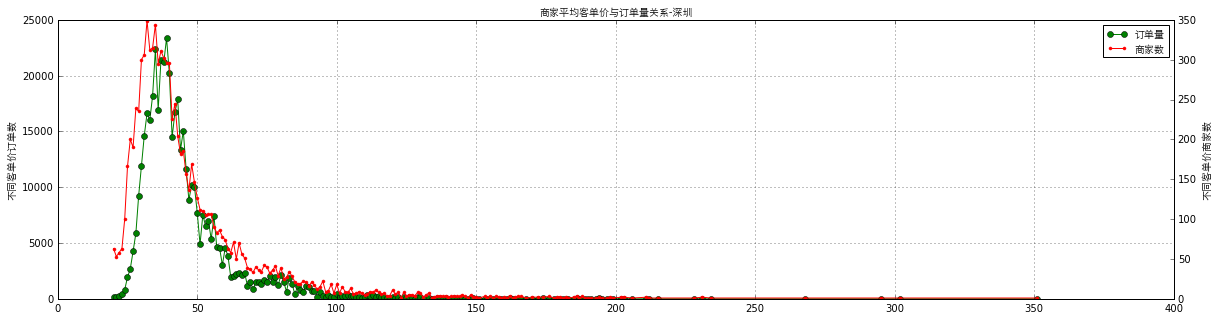

In [469]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)

df_temp = df_poi_sz2
#[df_poi_sz2['pkg_value_int']<150]


lns1 = ax.plot(df_temp['pkg_value_int'], 
               df_temp['waybill.id'], 
               'go-', 
               label = u'订单量')
ax2 = ax.twinx()
lns2 = ax2.plot(df_temp['pkg_value_int'], 
               df_temp['b.platform_poi_id'], 
               'r.-', 
               label = u'商家数')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='best',prop=zhfont1)

ax.grid(True)

ax.set_ylabel(u'不同客单价订单数', fontproperties=zhfont1)
ax2.set_ylabel(u'不同客单价商家数', fontproperties=zhfont1)
plt.xlabel(u'平均客单价', fontproperties=zhfont1)    

plt.title(u'商家平均客单价与订单量关系-深圳', fontproperties=zhfont1)
plt.show() 

In [470]:
df_poi_sz3 = df_poi_sz2.sort_values(['pkg_value_int'],ascending=False).reset_index(drop=True)
df_poi_sz3['poi_cnt'] = 0
df_poi_sz3['order_cnt'] = 0
for i in range(0,len(df_poi_sz3)):
    if(i==0):
        df_poi_sz3.iloc[i,3] = df_poi_sz3.iloc[i,1]
        df_poi_sz3.iloc[i,4] = df_poi_sz3.iloc[i,2]
    else:
        df_poi_sz3.iloc[i,3] = df_poi_sz3.iloc[i-1,3] + df_poi_sz3.iloc[i,1]
        df_poi_sz3.iloc[i,4] = df_poi_sz3.iloc[i-1,4] + df_poi_sz3.iloc[i,2]

df_poi_sz3

,pkg_value_int,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
0,351,1,1,1,1
1,302,1,1,2,2
2,295,1,1,3,3
3,268,1,1,4,4
4,234,1,1,5,5
5,231,2,5,7,10
6,228,1,9,8,19
7,215,1,7,9,26
8,212,1,3,10,29
9,211,2,3,12,32


In [559]:
df_poi_sz3[150:]

,pkg_value_int,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
150,52,110,7520,2480,107409
151,51,112,4886,2592,112295
152,50,127,7716,2719,120011
153,49,146,10059,2865,130070
154,48,169,10197,3034,140267
155,47,136,8855,3170,149122
156,46,157,11658,3327,160780
157,45,186,15053,3513,175833
158,44,182,13337,3695,189170
159,43,204,17866,3899,207036


In [473]:
df_poi_sz3['waybill.id'].sum()

466646

In [474]:
df_poi_sz3['b.platform_poi_id'].sum()

9162

In [513]:
466646*0.4

186658.40000000002

In [481]:
df_poi_sz = pd.read_csv('./data/poi-sz.csv',sep=';')
df_poi_sz.head()

,wm_poi_id,poi_min_price
0,19942,20
1,20680,20
2,21820,20
3,22410,20
4,24293,20


In [482]:
df_sz.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,b.pkg_value
0,1474214479041782,20160919,440300,1880,1348008,1474214479,1474216151,34.8,32.8,7,27.8
1,1474214645015636,20160919,440300,1880,1239716,1474214645,1474216746,31.0,31.0,7,24.0
2,1474214753004784,20160919,440300,405,870710,1474214753,1474215524,37.0,30.0,7,30.0
3,1474214929031759,20160919,440300,1928,502351,1474214929,1474216421,48.5,43.5,7,41.5
4,1474214996041685,20160919,440300,530,1328261,1474214996,1474217236,62.0,59.0,7,55.0


In [483]:
df_sz = pd.merge(df_sz,df_poi_sz,how='left',left_on='b.platform_poi_id',right_on='wm_poi_id')
df_sz.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,b.pkg_value,wm_poi_id,poi_min_price
0,1474214479041782,20160919,440300,1880,1348008,1474214479,1474216151,34.8,32.8,7,27.8,1348008,20
1,1474214645015636,20160919,440300,1880,1239716,1474214645,1474216746,31.0,31.0,7,24.0,1239716,20
2,1474214753004784,20160919,440300,405,870710,1474214753,1474215524,37.0,30.0,7,30.0,870710,20
3,1474214929031759,20160919,440300,1928,502351,1474214929,1474216421,48.5,43.5,7,41.5,502351,20
4,1474214996041685,20160919,440300,530,1328261,1474214996,1474217236,62.0,59.0,7,55.0,1328261,30


In [484]:
del df_sz['wm_poi_id']
df_sz.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,b.pkg_value,poi_min_price
0,1474214479041782,20160919,440300,1880,1348008,1474214479,1474216151,34.8,32.8,7,27.8,20
1,1474214645015636,20160919,440300,1880,1239716,1474214645,1474216746,31.0,31.0,7,24.0,20
2,1474214753004784,20160919,440300,405,870710,1474214753,1474215524,37.0,30.0,7,30.0,20
3,1474214929031759,20160919,440300,1928,502351,1474214929,1474216421,48.5,43.5,7,41.5,20
4,1474214996041685,20160919,440300,530,1328261,1474214996,1474217236,62.0,59.0,7,55.0,30


In [485]:
df_sz.rename(columns={'poi_min_price':'poi.poi_min_price'},inplace=True)

#### 起送价检查

In [560]:
df_minprice_sz = df_sz.groupby(['b.platform_poi_id']).agg({
                                                            'poi.poi_min_price': np.min,
                                                            'b.pkg_value':np.mean,
                                                            'waybill.id': np.size
    }).reset_index()

df_minprice_sz2 = df_minprice_sz[df_minprice_sz['b.pkg_value']>=51].groupby(['poi.poi_min_price']).agg({
                                                            'b.platform_poi_id': np.size,
                                                            'waybill.id': np.sum
    }).reset_index()
df_minprice_sz2 = df_minprice_sz2.sort_values(['poi.poi_min_price']).reset_index(drop=True)
df_minprice_sz2.head()

,poi.poi_min_price,b.platform_poi_id,waybill.id
0,15,3,5
1,20,1562,74514
2,21,14,360
3,22,1,8
4,23,2,77


In [561]:
df_minprice_sz3 = df_minprice_sz2.sort_values(['poi.poi_min_price'],ascending=False).reset_index(drop=True)
df_minprice_sz3.head()

,poi.poi_min_price,b.platform_poi_id,waybill.id
0,108,1,3
1,100,3,14
2,98,1,3
3,70,1,6
4,68,1,1


In [562]:
df_minprice_sz3['poi_cnt'] = 0
df_minprice_sz3['order_cnt'] = 0
for i in range(0,len(df_minprice_sz3)):
    if(i==0):
        df_minprice_sz3.iloc[i,3] = df_minprice_sz3.iloc[i,1]
        df_minprice_sz3.iloc[i,4] = df_minprice_sz3.iloc[i,2]
    else:
        df_minprice_sz3.iloc[i,3] = df_minprice_sz3.iloc[i-1,3] + df_minprice_sz3.iloc[i,1]
        df_minprice_sz3.iloc[i,4] = df_minprice_sz3.iloc[i-1,4] + df_minprice_sz3.iloc[i,2]

df_minprice_sz3
        

,poi.poi_min_price,b.platform_poi_id,waybill.id,poi_cnt,order_cnt
0,108.0,1,3,1,3
1,100.0,3,14,4,17
2,98.0,1,3,5,20
3,70.0,1,6,6,26
4,68.0,1,1,7,27
5,60.0,8,171,15,198
6,58.0,2,14,17,212
7,50.0,66,994,83,1206
8,49.0,2,12,85,1218
9,48.0,1,3,86,1221


In [563]:
df_minprice_sz.head()

,b.platform_poi_id,poi.poi_min_price,waybill.id,b.pkg_value
0,19942,20,548,52.375858
1,20680,20,61,38.278689
2,21820,20,963,46.037549
3,22410,20,2,26.750000
4,24293,20,85,52.322118


In [564]:
columns=['b.platform_poi_id','b.pkg_value']
df_sz_waybill_poi = df_minprice_sz[columns]
df_sz_waybill_poi.rename(columns={'b.pkg_value':'poi_pkg_value'},inplace=True)
df_sz_waybill_poi = pd.merge(df_sz,df_sz_waybill_poi,how='left')
df_sz_waybill_poi.head()

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,b.pkg_value,poi.poi_min_price,poi_pkg_value
0,1474214479041782,20160919,440300,1880,1348008,1474214479,1474216151,34.8,32.8,7,27.8,20,27.850000
1,1474214645015636,20160919,440300,1880,1239716,1474214645,1474216746,31.0,31.0,7,24.0,20,66.720000
2,1474214753004784,20160919,440300,405,870710,1474214753,1474215524,37.0,30.0,7,30.0,20,62.947368
3,1474214929031759,20160919,440300,1928,502351,1474214929,1474216421,48.5,43.5,7,41.5,20,36.645833
4,1474214996041685,20160919,440300,530,1328261,1474214996,1474217236,62.0,59.0,7,55.0,30,77.147727


In [565]:
df_sz_waybill_poi2 = df_sz_waybill_poi[df_sz_waybill_poi['poi_pkg_value']>=51]
df_sz_waybill_poi2.describe()

,waybill.id,waybill.dt,waybill.pkg_city_id,waybill.bm_delivery_area_id,b.platform_poi_id,a.ctime,a.utime,pkg_value,b.pkg_price,b.delivery_fee,b.pkg_value,poi.poi_min_price,poi_pkg_value
count,1.122950e+05,112295.000000,112295,112295.000000,112295.000000,1.122950e+05,1.122950e+05,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000
mean,1.474497e+15,20160921.616653,440300,5370.801149,815377.749748,1.474497e+09,1.474499e+09,73.136220,64.938413,5.273177,67.863043,23.799376,67.863043
std,1.499090e+11,1.727102,0,86382.650531,323418.820575,1.499090e+05,1.498895e+05,44.840908,43.146450,1.166114,44.719768,6.738294,17.951661
min,1.474214e+15,20160919.000000,440300,400.000000,19942.000000,1.474214e+09,1.474216e+09,23.700000,0.600000,2.000000,20.000000,15.000000,51.000000
25%,1.474364e+15,20160920.000000,440300,411.000000,576993.000000,1.474364e+09,1.474366e+09,42.500000,36.000000,4.000000,38.000000,20.000000,55.375000
50%,1.474515e+15,20160922.000000,440300,1117.000000,805428.000000,1.474515e+09,1.474518e+09,60.000000,52.000000,5.000000,55.000000,20.000000,61.105263
75%,1.474626e+15,20160923.000000,440300,2685.000000,1056078.000000,1.474626e+09,1.474628e+09,89.000000,80.000000,6.000000,83.550000,25.000000,76.364706
max,1.474733e+15,20160924.000000,440300,2001212.000000,1544824.000000,1.474733e+09,1.474799e+09,400.000000,400.000000,10.000000,396.000000,108.000000,351.000000


In [566]:
df_sz_waybill_poi3=df_sz_waybill_poi[df_sz_waybill_poi['poi_pkg_value']>=51]
columns=['waybill.bm_delivery_area_id','b.platform_poi_id']
df_output = df_sz_waybill_poi3[columns]
df_output=df_output.drop_duplicates()
df_output.to_csv('./data/深圳平均客单价高于51的商家id.csv', index = False)

In [569]:
q = Query()
q.username = "hadoop_peisongpa"

q.query ='''
SELECT  DISTINCT(poi_id),poi_name,org_id,org_name,da_id,da_name,city_id,city_name,org_detail_type,is_ka
FROM mart_peisong.dim_poi_hierarchy
WHERE dt > '20160919'
AND city_id = 440300
AND valid_flag = 1;
'''
client = OpenHiveClient()    
client.query(q)
print client.fetchQueryLog()

CliDriver update main thread name to 2794f682-9ee2-48dc-b0ca-ca58af379f60
16/09/27 10:54:01 INFO CliDriver: CliDriver update main thread name to 2794f682-9ee2-48dc-b0ca-ca58af379f60

Logging initialized using configuration in jar:file:/opt/meituan/versions/mthive-0.13-package/lib/hive-common-0.13.1.jar!/hive-log4j.properties
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks not specified. Estimated from input data size: 3
In order to change the average load for a reducer (in bytes):
  set hive.exec.reducers.bytes.per.reducer=<number>
In order to limit the maximum number of reducers:
  set hive.exec.reducers.max=<number>
In order to set a constant number of reducers:
  set mapreduce.job.reduces=<number>
Starting Job = job_1474690505972_661186, Tracking URL = http://rz-data-hdp-rm01.rz.sankuai.com:8088/proxy/application_1474690505972_661186/
Kill Command = /opt/meituan/hadoop/bin/hadoop job  -kill job_1474690505972_661186
Hadoop job information for Stage-1: number of mappers

In [570]:
db_res = client.fetchAll()

df_res = []
for ln in db_res:
    df_res.append(ln.replace('\n', '').split('\t'))
df_res = pd.DataFrame(df_res)  
df_res.columns = client.fetchQueryHeader()

#df_res.to_csv('./data/深圳所有商家名称.csv', index=False)

In [571]:
df_res.to_csv('./data/深圳所有商家名称.csv', index=False)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 0-2: ordinal not in range(128)

In [556]:
df_res.head()

,poi_id,poi_name,org_id,org_name,da_id,da_name,city_id,city_name,org_detail_type,is_ka
0,7088,牛当道-黄焖鸡米饭（清真）,4137,深圳科技园众包,2315,深圳科技园众包,440300,深圳,401,0
1,20680,张记瓦罐汤,381,科技园站,401,科技园,440300,深圳,101,0
2,22480,百草香正宗黄焖鸡米饭（总店）,3788,深圳华强北众包,2083,深圳华强北众包,440300,深圳,401,0
3,23804,江西米粉（人民南店）,3880,深圳国贸众包,2146,深圳国贸众包,440300,深圳,401,0
4,23898,常德菜馆（国际名园店）,3880,深圳国贸众包,2146,深圳国贸众包,440300,深圳,401,0


In [557]:
df_poiall_sz = df_res

In [576]:
df_res['poi_id2']=df_res['poi_id'].apply(lambda x: int(x))
df_output['poi_id2']=df_output['b.platform_poi_id'].apply(lambda x: int(x))

In [567]:
df_output = pd.read_csv('./data/深圳平均客单价高于51的商家id.csv')
df_output.head()

,waybill.bm_delivery_area_id,b.platform_poi_id
0,1880,1239716
1,405,870710
2,530,1328261
3,2072,1101932
4,1640,764599


In [578]:
df_output2 = pd.merge(df_output,df_res,how='left')
df_output2.head()

,waybill.bm_delivery_area_id,b.platform_poi_id,poi_id2,poi_id,poi_name,org_id,org_name,da_id,da_name,city_id,city_name,org_detail_type,is_ka
0,1880,1239716,1239716,1239716,夜色主题烤吧,3355,横岗站,1880,横岗,440300,深圳,101,0
1,405,870710,870710,870710,鼎丰音乐烤吧,379,车公庙站,405,车公庙,440300,深圳,101,0
2,530,1328261,1328261,1328261,香木园烧烤（华丽店）,697,翠竹站,530,翠竹,440300,深圳,101,0
3,2072,1101932,1101932,1101932,四川风味烧烤,3943,丹竹头站,2072,丹竹头,440300,深圳,101,0
4,1640,764599,764599,764599,一品烧鸡,2919,吉祥站,1640,吉祥,440300,深圳,101,0


In [583]:
df_output2.to_csv('./data/深圳平均客单价高于51的商家.csv', index=False)

In [580]:
import sys
reload(sys)

sys.setdefaultencoding('utf8')